<a href="https://colab.research.google.com/github/Haarrsshhiitt/Python-with-Pandas-PCA/blob/main/Banking_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as np
import pandas as pd
data=pd.read_csv('/content/Bank_churn_modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [103]:
data = data.set_index('RowNumber')

In [104]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [105]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [106]:
data1=data.loc[:,('Age','EstimatedSalary')]

In [107]:
from sklearn import preprocessing as pp
ss = pp.StandardScaler()

ss.fit(data1)
norm_data=ss.transform(data1)


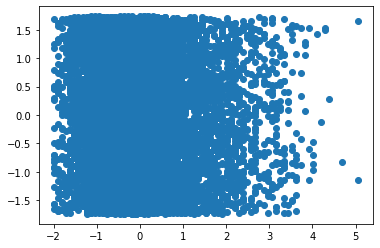

In [108]:
import matplotlib.pyplot as plt
ax=plt.gca()
ax.scatter(norm_data[:,0],norm_data[:,1])

In [109]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [110]:
data.drop(["Surname","Geography","Gender","CustomerId"], axis=1, inplace=True)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1
2,608,41,1,83807.86,1,0,1,112542.58,0
3,502,42,8,159660.80,3,1,0,113931.57,1
4,699,39,1,0.00,2,0,0,93826.63,0
5,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0
9997,516,35,10,57369.61,1,1,1,101699.77,0
9998,709,36,7,0.00,1,0,1,42085.58,1


In [121]:
from sklearn import preprocessing as pp
ss = pp.StandardScaler()

ss.fit(data)
norm_data=ss.transform(data)
norm_data.shape


(10000, 9)

In [122]:
norm_data

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.97024255,
         0.02188649,  1.97716468],
       [-0.44003595,  0.19816383, -1.38753759, ...,  0.97024255,
         0.21653375, -0.50577476],
       [-1.53679418,  0.29351742,  1.03290776, ..., -1.03067011,
         0.2406869 ,  1.97716468],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ...,  0.97024255,
        -1.00864308,  1.97716468],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -1.03067011,
        -0.12523071,  1.97716468],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -1.03067011,
        -1.07636976, -0.50577476]])

In [123]:
import numpy as np
data_covar=np.cov(norm_data)
np.shape(data_covar)

(10000, 10000)

In [127]:
from sklearn.decomposition import PCA
data_pca=PCA()
data_pca.fit(norm_data)
data_pca1 = data_pca.transform(norm_data)

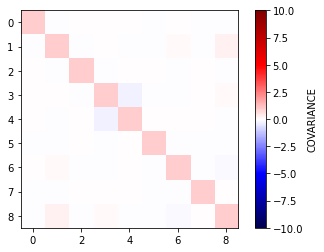

In [138]:
import matplotlib.pyplot as plt
ax=plt.gca()
data2=data_pca.get_covariance()
img = ax.imshow(data2, cmap='seismic', vmin=-10, vmax=10)
plt.colorbar(img, label='COVARIANCE')